## HW-CI-3 kNN classifier
A. Cabri & F. Masulli DIBRIS - UNIGE



**Authors:** ....

**Date:** .....


# ASSIGNMENT: Develop a kNN classifier from scratch
The k-Nearest Neighbors algorithm is commonly available within the standard machine learning libraries, but implementing the algorithm from scratch is a good exercise to better understand important aspects of the approach and experiment your own variations.

In this notebook, you find some code snippets that will guide you through the development process by filling in the missing code, as indicated in the cells below.

Do the tasks required by the TODOs

# The approach


### The k-Nearest Neighbors algorithm
It is a supervised classification technique based on the similarity between instances. The training dataset is stored upfront and, when a prediction is required, the algorithm identifies the $k$ most similar training records and returns either the most common class value, in case of classification, or the average, in case of regression.

In this notebook, we will be using the classic publicly available **Iris Dataset** that provides a multinomial classification problem for predicting the flower species from 4 characterizing features. 

This dataset and many others can be downloaded at https://archive.ics.uci.edu/ml/datasets.php

The dataset, available in file `iris.csv`, is organized as follows:

* Sepal length in cm
* Sepal width in cm
* Petal length in cm
* Petal width in cm
* Class

We will also be using some accessory libraries (pandas, numpy) for easier loading the dataset and other array management operations.

### First Step: Download the dataset and perform an initial exploratory analysis

The next cell shows how to load a CSV into a pandas dataframe and prints the first elements of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('/Users/alivarastehranjbar/Desktop/Python/CI HW/iris.csv', names=col_names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The boxplots are useful for visualizing the statistical aspects of dataset features (for more details about boxplots, please refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) 

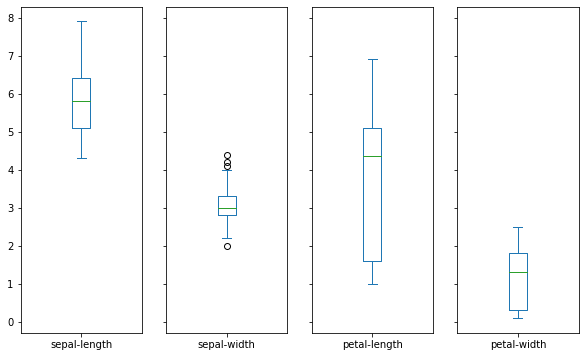

In [2]:
dataset.plot(kind='box', subplots=True, sharey=True, figsize=(10,6))
plt.show()

Now, we are going to plot the histograms of each feature and scatter-plots of the different pairs of features, with dots with a specific colour for each class.

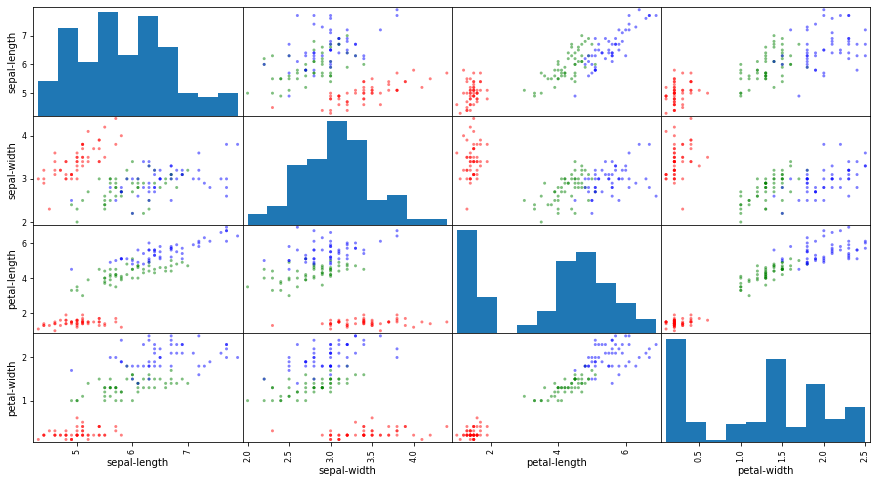

In [3]:
from pandas.plotting import scatter_matrix

color_wheel = {'Iris-setosa': "red", 
               'Iris-versicolor': "green", 
               'Iris-virginica': "blue"}
colors = dataset['class'].map(lambda x: color_wheel.get(x))
scatter_matrix(dataset, figsize=(15,8), diagonal='hist', c=colors)
plt.show()

### Start creating the building blocks

### TODO #1 Euclidean Distance
We now need to choose a similarity/distance function.
We will use  the Euclidean distance.

The Euclidean distance $ \it D(\mathbf\alpha, \mathbf\beta ) $ between two vectors $ \mathbf{\alpha} = \left[ \alpha_1, \alpha_2, \cdots, \alpha_n \right] $ and $ \mathbf{\beta} = \left[ \beta_1, \beta_2, \cdots, \beta_n \right] $ is defined as

$$
D(\mathbf\alpha, \mathbf\beta ) = \sqrt{\sum_{i=1}^{n} (\alpha_i - \beta_i)^2}
$$

To calculate the Euclidean distance, we will consider two  different approaches: 

* A1: Iteration over the items to sum the squared differences elementwise and then compute the square root
* A2. Dot product on the elementwise difference vector


Fill the missing code into the following functions:

In [4]:
def euclidean_distance1(vect1, vect2): #calculation of the Euclidean distance using A1
    # add your code here ...
    euclidean_distance1 = (np.sum((vect1-vect2)**2))**(1/2)
    return euclidean_distance1

def euclidean_distance2(vect1, vect2): #calculation of the Euclidean distance using A2
    # add your code here ...
    euclidean_distance2 = (np.dot(vect1-vect2,vect1-vect2))**(1/2)
    return euclidean_distance2

def euclidean_distance3(vect1, vect2): #calculation of the Euclidean distance using A2
    # add your code here ...
    euclidean_distance3 = np.linalg.norm(vect1 - vect2)
    return euclidean_distance3

# np.linalg.norm(a-b) 

The following cell provides an example on how to use the function with the iris dataset, where the expected result for both funtions is about `0.538`:

In [5]:
# the first index in iloc selects the row whereas the second one selects the columns
print(euclidean_distance1(np.array(dataset.iloc[0][0:4]),np.array(dataset.iloc[1][0:4])))

print(euclidean_distance2(np.array(dataset.iloc[0][0:4]),np.array(dataset.iloc[1][0:4])))

print(euclidean_distance3(np.array(dataset.iloc[0][0:4]),np.array(dataset.iloc[1][0:4])))

0.5385164807134502
0.5385164807134502
0.5385164807134502


###  Neighbors Selection
The next step is defining a function to select the neighbors for a new data item. The function must create a list, ordered by distance, of the k closest training items.

We will implement a basic algorithm. In the letterature kNN there are many optimizations of this basic search algorithm using tree structures  aimed at increase the speed-up making use ball tree [1,2], k-d tree [3], nearest feature line (NFL) [4], tunable metric [5], principal axis search tree [6] and orthogonal search tree [7].
1.  T. Liu, A. W. Moore, A. Gray, “New Algorithms for Efficient High
Dimensional Non-Parametric Classification”, Journal of Machine
Learning Research, 2006, pp 1135-1158.
2.  S. N. Omohundro, “Five Ball Tree Construction Algorithms”, 1989,
Technical Report.
3.  R. F Sproull, “Refinements to Nearest Neighbor Searching”, Technical
Report, International Computer Science, ACM (18) 9, pp 507-517.
4. S. Z Li, K. L. Chan, “Performance Evaluation of The NFL Method in
Image Classification and Retrieval”, IEEE Trans On Pattern Analysis
and Machine Intelligence, Vol 22, 2000.
5. Y. Zhou, C. Zhang, “Tunable Nearest Neighbor Classifier”, DAGM
2004, LNCS 3175, pp 204-211.
6. Y. C. Liaw, M. L. Leou, “Fast Exact k Nearest Neighbor Search using
Orthogonal Search Tree”, Pattern Recognition 43 No. 6, pp 2351-2358.
7. J. Mcname, “Fast Nearest Neighbor Algorithm based on Principal Axis
Search Tree”, IEEE Trans on Pattern Analysis and Machine Intelligence,
Vol 23, pp 964-976. 



### TODO #2
1. Fill the missing code into the following function


In [6]:
def get_neighbors(training_list, test_item, k_neighbors):
# training_list: array of items selected as training
# test_item: item to be tested with kNN
# k_neighbors: number of neighbors to consider in classification
    deltas = list()
    
    # create a list of distances by iterating over all rows in the training set
    for ix, training_item in training_list.iterrows():
        dist = euclidean_distance1(np.array(training_item[0:4]),np.array(test_item[0:4]))
        #dist = euclidean_distance2(np.array(training_item[0:4]),np.array(test_item[0:4]))
        deltas.append([training_item, dist])

    # def voters
    setosa_vot = 0
    versicolor_vot = 0
    virginica_vot = 0
    
    # try to find weight voting
    for items, distances in deltas:
        if distances != 0:
            if items[4] == 'Iris-setosa':
                setosa_vot += 1/(distances**2)
            elif items[4] == 'Iris-versicolor':
                versicolor_vot += 1/(distances**2)
            elif items[4] == 'Iris-virginica':
                virginica_vot += 1/(distances**2)

    # sort the list in ascending order
    deltas.sort(key=lambda x: x[1])
    # select the first k neighbors and return them
    neighbors = list()
    # add your code here ...
    for i in range(k_neighbors):
        neighbors.append(deltas[i])

    return neighbors, setosa_vot, versicolor_vot, virginica_vot

### TODO #3 Rejection Criterion 
Now it's time to make a prediction, based on the <span style="color:red">**most represented class**</span> among the neighbors. The algorithm must select the class labels from the list of neighbors and output the most frequent one.

If two classes have equal occurrences the function must return <span style="color:red">**rejected**</span>. Therefore we must define a new function to check that only one class has the max number of occurrences. Follow the comments within the code to complete the function:

In [7]:
def only_one_max(the_list, item):
    # if only one list item has the max value returns True otherwise False
    count_class = list()
    for i in set(the_list):
        count_class.append(the_list.count(i))
    if count_class.count(max(count_class)) == 1:
         return True
    else:
#        print(the_list,"Max",max(count_class),"false",count_class) for better understanding
        return False    

### TODO #4 KNN Class Prediction
Now complete the following function that returns a class prediction for the current test item or <span style="color:red">**rejected**</span> if two or more classes have the maximum number of occurrences.

In [8]:
def predict(training_list, test_item, k_neighbors):
# training_list: array of items selected as training
# test_item: item to be tested with kNN
# k_neighbors: number of neighbors to consider in classification

    # value of neighbors and weight vote
    neighbors, setosa_vot, versicolor_vot, virginica_vot= get_neighbors(training_list, test_item, k_neighbors)
    
    # retrieve the list of neighbors
    classes = list()

    # create a list of the neighbors' classes and assign the most frequent one to prediction
    for items, dist in neighbors:
        classes.append(items[4])      
    counter = 0
    max_classes = None
    for i in classes:
        if classes.count(i) > counter:
            max_classes = i
            counter = classes.count(i)
    prediction = max_classes
    # check if only one class has the max value
    if not only_one_max(classes, prediction):
        prediction = 'Rejected'
    
    
    return prediction, setosa_vot, versicolor_vot, virginica_vot

### Putting it all together 

You can now load the sets for training and test datasets that are available in the *iris_train.csv* and *iris_test.csv* files respectively that are included in the zip archive of this homework. The files *iris_train.csv* and *iris_test.csv* result from a random split of the orginal *iris.csv* file. Use the code already presented inside this notebook.

In [9]:
train_ds = pd.read_csv('/Users/alivarastehranjbar/Desktop/Python/CI HW/iris_train.csv', names=col_names)
test_ds = pd.read_csv('/Users/alivarastehranjbar/Desktop/Python/CI HW/iris_test.csv', names=col_names)

The following cell must generate a list of predictions to be compared with the ground truth available in the `class` column of the test dataset. Meanwhile, it is now possible to compute the classification rate, aka **accuracy**, defined as:
$$Acc =\frac{\sum_l TP_l}{||X||} $$
where $l$ are the classes, $TP_l$ is the number of True Positive for class $l$ and $||X||$ is the size of the test set. 

The `results` dataframe contains the number of correctly assigned labels for each **k** value. 

Confusion matrix for k = 1
[[40  0  0]
 [ 0 34  6]
 [ 0  1 39]]

Confusion matrix for k = 2
[[40  0  0  0]
 [ 0 34  3  3]
 [ 0  1 38  1]
 [ 0  0  0  0]]

Confusion matrix for k = 3
[[40  0  0]
 [ 0 35  5]
 [ 0  1 39]]

Confusion matrix for k = 4
[[40  0  0  0]
 [ 0 29  5  6]
 [ 0  1 39  0]
 [ 0  0  0  0]]

Confusion matrix for k = 5
[[40  0  0]
 [ 0 30 10]
 [ 0  1 39]]

Confusion matrix for k = 8
[[40  0  0  0]
 [ 0 30  6  4]
 [ 0  1 35  4]
 [ 0  0  0  0]]

   correct_values  accuracy  Iris_setosa_vot  Iris_versicolor_vot  \
k                                                                   
1             113  0.941667      2163.416156          1355.786162   
2             112  0.933333      2163.416156          1355.786162   
3             114  0.950000      2163.416156          1355.786162   
4             108  0.900000      2163.416156          1355.786162   
5             109  0.908333      2163.416156          1355.786162   
8             105  0.875000      2163.416156          1

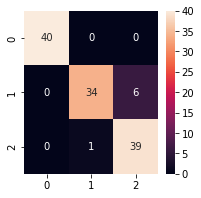

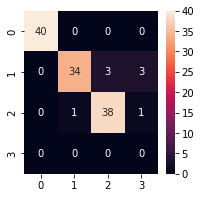

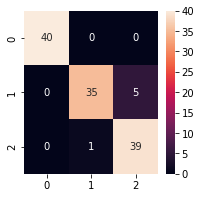

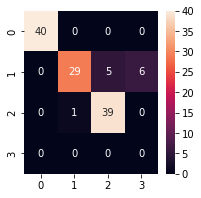

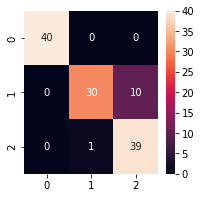

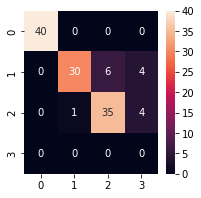

In [10]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

kays = [1,2,3,4,5,8]   # list of neighbors to be tested to find the optima solution

res = list()
t_0 = time.time()
for k in kays:
    preds = list()
    
    # create voting parameters
    list_vote = {"Iris_setosa_vot" : 0,"Iris_versicolor_vot" : 0,"Iris_virginica_vot" : 0}
    
    # create a list of predictions for each test item at variable k
    for i in range(test_ds.index.size):
        p, setosa_vot, versicolor_vot, virginica_vot = predict(train_ds,test_ds.iloc[i],k)
        preds.append([p,k])
        list_vote["Iris_setosa_vot"] += setosa_vot
        list_vote["Iris_versicolor_vot"] += versicolor_vot
        list_vote["Iris_virginica_vot"] += virginica_vot
        
    max_vote = max(list_vote, key=list_vote.get)    
    predictions = pd.DataFrame(preds, columns=['class','k'])
    correct_count = sum(test_ds['class'] == predictions['class'])


#     for key, value in a_dict.items():
#         if max_vote == value:
#             found_key = key       
    #correct_vote = sum(test_ds['class'] == )
    
    
    
    
    
    res.append([k,correct_count,correct_count/test_ds.index.size,list_vote["Iris_setosa_vot"],
                list_vote["Iris_versicolor_vot"],list_vote["Iris_virginica_vot"],max_vote])
    
    # here we can print the confusion matrix
    cm = confusion_matrix(test_ds['class'],predictions['class'])
    print('Confusion matrix for k = '+str(k)+'\n'+str(cm)+'\n')
    df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[0]))
    plt.figure(figsize = (3,3))
    sn.heatmap(df_cm, annot=True)

results = pd.DataFrame(res, columns=['k','correct_values','accuracy','Iris_setosa_vot',
                                    'Iris_versicolor_vot','Iris_virginica_vot','Final Vote'])
results.set_index('k', inplace=True)
print(results)
t_p= time.time()
print ('Computing time (seconds) = {:.2f}.'. format(t_p-t_0))

**Note that if the confusion matrix has 4 rows and columns, the last colums refers to the rejected predictions.**

array([<AxesSubplot:xlabel='k'>], dtype=object)

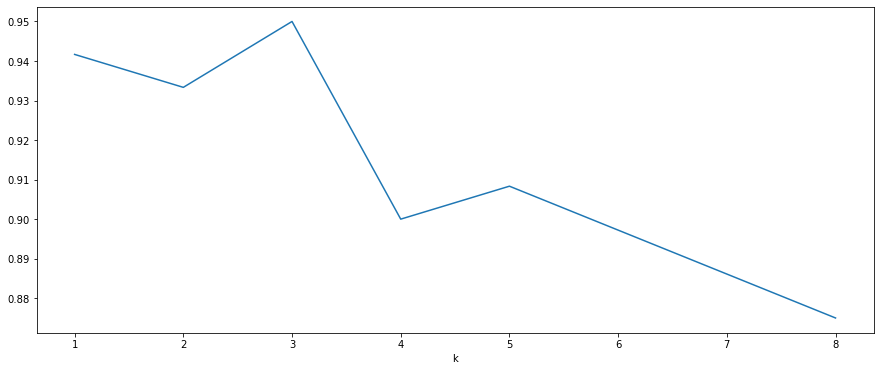

In [11]:
results['accuracy'].plot(subplots=True, figsize=(15, 6))